# 0. Tạo danh sách cách từ stopword, viết tắt

các từ viết tắt hay xuất hiện trên mạng xã hội

In [11]:
vietnamese_teen_slang = {
    # Từ viết tắt cơ bản
    "đc": "được",
    "dc": "được", 
    "k": "không",
    "ko": "không",
    "kg": "không",
    "kh": "không",
    "khg": "không",
    "cx": "cũng",
    "cg": "cũng",
    "nx": "nữa", 
    "nz": "nữa",
    "r": "rồi",
    "z": "rồi",
    "zồi": "rồi",
    "zì": "gì",
    "j": "gì",
    "gj": "gì",
    "mk": "mình",
    "vk": "vợ",
    "vc": "vãi cả",
    "mìk": "mình",
    "t": "tao",
    "tao": "tao", 
    "m": "mày",
    "may": "mày",
    "b": "bạn",
    "tn": "thế này",
    "bn": "bạn",
    "e": "em",
    "a": "anh",
    "c": "chị",
    "vs": "với",
    "w": "với",
    "v": "vậy",
    "chs": "chơi",
    "ch": "chưa",
    "chx": "chưa",
    "ntn": "như thế nào",
    "stn": "sao thế này",
    "tbn": "thế bạn",
    "h": "giờ",
    "bh": "bây giờ",
    "lh": "liên hệ",
    "ns": "nói",
    "nc": "nước",
    "nch": "nói chuyện",
    "ncl": "nói chung là",
    "nc": "nói chuyện",
    "xl": "xin lỗi",
    "sr": "sorry",
    "tks": "thanks",
    "cảm ơn": "cảm ơn",
    "ty": "thank you",
    "thx": "thanks",
    "aui": "anh yêu",
    "ô": "ông",
    "csgt": "cảnh sát giao thông",
    "hv": "học viện",
    "cntt": "công nghệ thông tin",
    "mn": "mọi người",
    "mng": "mọi người",
    "hphi": "học phí",
    
    # Từ teen phổ biến
    "tml": "thằng mặt lồn",
    "đm": "địt mẹ",
    "dm": "đijt mẹ",
    "wtf": "cái địt",
    "omg": "ôi trời ơi",
    
    
    # Từ toxic/chửi thề (cho bài toán phân loại toxic)
    "vcl": "vãi cả lồn",
    "vl": "vãi lồn", 
    "cc": "cặc",
    "cl": "cái lồn",
    "clm": "cái lồn mẹ",
    "cmm": "con mẹ mày",
    "cmn": "con mẹ nó",
    "cmnr": "con mẹ nó rồi",
    "dcm": "địt con mẹ",
    "dcmm": "địt con mẹ mày",
    "dcmn": "địt con mẹ nó", 
    "đcm": "địt con mẹ",
    "đcmm": "địt con mẹ mày",
    "lz": "lồn",
    "l": "lồn",
    "lol": "lồn",
    "nml": "não mẹ lồn",
    "nmn": "não mẹ nó",
    "nmm": "não mẹ mày",
    "vkl": "vãi ka lồn",
    "voz": "vãi lồn", 
    "shit": "địt",
    "fuck": "địt",
    "fk": "địt",
    "damn": "chết tiệt",
    "bitch": "con đĩ",
    "asshole": "thằng lồn",
    "stupid": "ngu",
    "idiot": "ngu",
    "retard": "khùng",
    "gay": "đồng tính",
    "die": "chết đi",
    "kill": "giết",
    "hate": "ghét",
    "ugly": "xấu",
    "fat": "béo",
    "loser": "thất bại",
    "noob": "thua kém",
    "trash": "rác",
    "cancer": "ung thư",
    "toxic": "độc hại",
    
    # Từ toxic tiếng Việt
    "ngu": "ngu",
    "khùng": "khùng",
    "điên": "điên", 
    "đần": "đần",
    "tởm": "tởm",
    "ghê": "ghê",
    "dở": "dở",
    "tệ": "tệ",
    "tồi": "tồi",
    "rác": "rác",
    "shit": "cứt",
    "fck": "địt",
    "fuk": "địt",
    "dam": "chết tiệt",
    "hell": "địa ngục",
    
    # Từ viết tắt toxic
    "fku": "địt mẹ mày",
    "fucku": "địt mẹ mày",
    "fuck you": "địt mẹ mày",
    "suck my dick": "bú cặc tao",

    
    # Từ xúc phạm nhẹ
    "suck": "tệ",
    "đúng z": "đúng rồi",
    "oke": "okay",
    "okie": "okay",
    "ok": "okay",
    "okela": "okay",
    "roài": "rồi",
    "zậy": "vậy",
    "zị": "gì",
    "zàng": "gì vậng",
    "zề": "gì thế",
    "zay": "vậy",
    "uk": "ừ",
    "uh": "ừ",
    "uhm": "ừm",
    "hm": "hmm",
    "hihi": "cười",
    "hehe": "cười",
    "huhu": "khóc",
    "hoho": "cười",
    
    # Từ mạng xã hội
    "flex": "khoe khoang",
    "chill": "thư giãn",
    "slay": "xuất sắc",
    "ship": "ghép đôi",
    "crush": "người thích",
    "babe": "người yêu",
    "bff": "bạn thân mãi mãi",
    "simp": "dại gái",
    "toxic": "độc hại",
    "red flag": "tín hiệu nguy hiểm",
    "green flag": "tín hiệu tích cực",
    
    # Từ game/internet
    "gg": "good game",
    "ez": "dễ ợt",
    "noob": "nghiệp dư",
    "pro": "chuyên nghiệp", 
    "lag": "giật",
    "bug": "lỗi",
    "hack": "gian lận",
    "tryhard": "cố gắng hết mức",

    
    # Từ mới xuất hiện
    "fire": "xuất sắc",
    
    # Từ viết tắt khác
    "nt": "như thế",
    "bt": "bình thường",
    "vt": "vậy thì",
    "đt": "điện thoại",
    "fb": "facebook",
    "ig": "instagram", 
    "tt": "tiktok",
    "yt": "youtube",
    "zl": "zalo",
    "mess": "messenger",
    "vib": "vietinbank",
    "tech": "techcombank",
    "vcb": "vietcombank",
    "mb": "mbbank",
    "tp": "thành phố",
    "q": "quận",
    "p": "phường",
    "st": "street",
    "rd": "road",
    "snvv": "sinh nhật vui vẻ",
    
    # Từ cảm xúc
    "uwu": "dễ thương",
    "owo": "ngạc nhiên",

    
    # Từ thời gian
    "gl": "good luck",

}

các từ dừng hay xuất hiện

In [12]:
vietnamese_stopwords = [
    # Đại từ nhân xưng
    "tôi", "bạn", "anh", "chị", "em", "ông", "bà", "cô", "chú", "cậu",
    "mình", "ta", "chúng ta", "chúng tôi", "các bạn", "họ", "nó",
    "tự", "ai", "gì", "nào", "sao", "thế nào", "như thế nào", "mày",
    "tao",

    
    # Từ chỉ định
    "này", "đó", "kia", "đây", "đấy", "kìa", "nọ",
    
    # Giới từ
    "của", "với", "cho", "tại", "trong", "ngoài", "trên", "dưới",
    "về", "đến", "từ", "theo", "sau", "trước", "giữa", "bên",
    "cùng", "nhờ", "bởi", "do", "vì", "để", "mà", "như",
    
    # Liên từ
    "và", "hay", "hoặc", "nhưng", "song", "mặc dù", "tuy", "dù",
    "nếu", "giả sử", "khi", "lúc", "hồi", "thuở", "tức là",
    "nghĩa là", "tức", "tuy nhiên", "tuy thế", "thế nhưng",
    
    # Từ hỏi
    "làm sao", "ra sao", "thế nào", "như nào", "bao giờ", "khi nào",
    "ở đâu", "tại sao", "vì sao", "tại làm sao", "bằng cách nào",
    
    # Trợ động từ
    "là", "thì", "mà", "rồi", "đã", "sẽ", "có thể", "phải",
    "nên", "được", "bị", "vẫn", "vẫn còn", "còn", "đang",
    "sắp", "vừa", "mới", "cũng", "cùng", "chỉ", "chỉ có",
    
    # Từ định lượng
    "nhiều", "ít", "vài", "mấy", "bao nhiêu", "tất cả", "toàn bộ",
    "cả", "mọi", "từng", "mỗi", "một số", "phần lớn", "đa số",
    "thiểu số", "một phần", "hầu hết", "gần như", "hơn", "dưới",
    
    # Từ thời gian
    "hôm nay", "ngày mai", "hôm qua", "tuần này", "tháng này",
    "năm này", "hiện tại", "bây giờ", "lúc này", "khi đó",
    "lúc đó", "thuở đó", "ngày xưa", "xưa kia", "sau này",
    
    # Từ nối, từ tình thái
    "thật", "thực", "quả", "đúng", "rõ", "rất", "khá", "hơi",
    "tương đối", "khôn", "lắm", "quá", "cực", "cực kỳ",
    "vô cùng", "hết sức", "đặc biệt", "nhất là", "đúng là",
    
    # Các từ khác thường gặp
    "về phần", "về mặt", "theo như", "như vậy", "thế thôi",
    "vậy thôi", "chỉ thế", "có lẽ", "chắc", "chắc chắn",
    "dĩ nhiên", "tất nhiên", "đương nhiên", "hiển nhiên",
    "rõ ràng", "hẳn", "nhất định", "chắc hẳn",
    
    # Từ kết thúc câu
    "thôi", "vậy", "đó", "mà thôi", "à", "ạ", "ư", "hử",
    "nhé", "nha", "ha", "hehe", "hihi",
    
    # Từ phổ biến khác
    "việc", "chuyện", "công việc", "vấn đề", "vần đề", "điều",
    "cái", "con", "chiếc", "cuốn", "quyển", "bức", "bài",
    "người", "thằng", "con người", "ai đó", "có người",
    "gia đình", "nhà", "quê", "quê hương", "đất nước",
    
    # Từ cảm thán không phủ định
    "ôi", "ối", "ơi", "ừ", "ờ", "à", "ạ", "ư", "hử",
    "wow", "wao", "chà", "trời", "trời ơi", "chao ôi",
    
    # Từ chỉ mức độ
    "hơn hẳn", "kém", "bằng", "ngang", "thua", "thắng",
    "cao", "thấp", "lớn", "nhỏ", "to", "bé", "dài", "ngắn",
    
    # Từ chỉ phương hướng
    "lên", "xuống", "vào", "ra", "qua", "lại", "lui",
    "tới", "đi", "về", "lại đây", "ra đó", "vào trong",
    
    # Số đếm cơ bản
    "một", "hai", "ba", "bốn", "năm", "sáu", "bảy", "tám", "chín", "mười",
    "trăm", "nghìn", "triệu", "tỷ", "đầu tiên", "thứ hai", "thứ ba",
    
    # Từ khẳng định (không phủ định)
    "ừ", "ờ", "đúng", "phải", "được", "ok", "oke", "okie",
    
    # Từ chỉ thời điểm
    "sáng", "chiều", "tối", "đêm", "trưa", "sớm", "muộn",
    "Thứ Hai", "Thứ Ba", "Thứ Tư", "Thứ Năm", "Thứ Sáu", "Thứ Bảy", "Chủ Nhật"
]

# 1. Đọc dữ liệu

In [13]:
import numpy as np
import pandas as pd

Đọc dữ liệu

In [14]:
df = pd.read_csv('train_spam.csv').drop_duplicates()
df

,comment,label
0,Mọi người cho em hỏi lớp thầy Hiệp kiểm tra gi...,0
1,"Em pass bomber sz M, còn mới ạ, bạn nào cần ib...",1
2,"Có ai học lại môn XSTK với cô Mai k, cho em xi...",0
3,"Mình có 1 slot học nhóm ở thư viện, ai cần học...",0
4,ib zalo mình 0987444222 để nhận tài liệu ôn th...,1
...,...,...
3697,Ngại hết cả Trần Nhật Minh,0
3698,Kiều Oanh,0
3699,Trần Nhật Minh cấn quá r à,0
3700,Trần Nhật Minh hài zón,0


Kiểm tra số lượng lượng nhãn xuất hiện 

In [15]:
df['label'].value_counts()

label
0    2596
1    1082
Name: count, dtype: int64

# 2. Tiền xử lý dữ liệu

In [16]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import string
import re
import emoji

import warnings
warnings.filterwarnings("ignore")

from underthesea import word_tokenize, pos_tag, ner

Tạo ra các cột đặc trưng bao gồm:
- Đếm số lượng emoji trong tin nhắn, số lượng mặt cười nhiều cũng khả năng là dấu hiệu của tin nhắn spam
- Cột giá trị bool xem trong tin nhắn có email không
- Cột bool xem trong tin nhắn có link url không
- Cột đếm số lượng từ viết hoa full

In [17]:
def count_emoji(text):
    # Đếm Unicode emoji bằng thư viện
    unicode_emojis = [c for c in text if c in emoji.EMOJI_DATA]
    
    # Đếm text emoji
    text_emoji_pattern = re.compile(r'[:;=8xX][-~]?[)(DPpOo/\\]+')
    text_emoji_count = len(text_emoji_pattern.findall(text))
    
    return len(unicode_emojis) + text_emoji_count

def count_urls(text):
    return len(re.findall(r'https?://\S+|www\.\S+', text))

def count_emails(text):
    return len(re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text))

def count_uppercase_words(text):
    return len(re.findall(r'\b[A-Z]{2,}\b', text))

def count_number(text):
    return len(re.findall(r'\d', text))

def create_count_col(data, col_comment_name):

    data = data.copy()
    data['num_emoji'] = data[col_comment_name].apply(count_emoji)
    data['num_email'] = data[col_comment_name].apply(count_emails)
    data['num_link'] = data[col_comment_name].apply(count_urls)
    data['num_upper'] = data[col_comment_name].apply(count_uppercase_words)
    data['Count_num'] = data[col_comment_name].apply(count_number)

    return data

Áp dụng pipeline thêm các cột mang thông tin của đoạn comment 

In [18]:
df = create_count_col(df, 'comment')

In [19]:
df.head()

,comment,label,num_emoji,num_email,num_link,num_upper,Count_num
0,Mọi người cho em hỏi lớp thầy Hiệp kiểm tra gi...,0,0,0,0,0,0
1,"Em pass bomber sz M, còn mới ạ, bạn nào cần ib...",1,0,0,0,0,0
2,"Có ai học lại môn XSTK với cô Mai k, cho em xi...",0,1,0,0,1,0
3,"Mình có 1 slot học nhóm ở thư viện, ai cần học...",0,0,0,0,0,1
4,ib zalo mình 0987444222 để nhận tài liệu ôn th...,1,0,0,0,0,10


Pipeline tiền xử lý dữ liệu

In [20]:
def lowercase(text):
    # Đưa về viết thường
    return text.lower()

def remove_urls(text):
    """Loại bỏ các link URL"""
    # Loại bỏ http/https links
    text = re.sub(r'http\S+|www\.\S+', '', text)
    # Loại bỏ các link dạng domain.com
    text = re.sub(r'\S+\.(com|vn|net|org|edu|gov)\S*', '', text)
    return text

def remove_emails(text):
    """Loại bỏ email (thường có trong spam)"""
    return re.sub(r'\S+@\S+', '', text)

def punctuation_removal(text):
    # Loại bỏ các dấu câu
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator) 

def remove_number(text):
    return re.sub(r'\d+', '', text)

def remove_emoji(text):
    # Loại bỏ Unicode emoji (😂🎉💰 etc.) bằng thư viện emoji
    text = emoji.replace_emoji(text, replace='')
    
    # Loại bỏ text-based emoji (:D :) :P etc.)
    text = re.sub(r'[:;=8xX][-~]?[)(DPpOo/\\]+', '', text)
    
    return text

def normalize_abbreviations(text):
    # Chuẩn hóa viết tắt
    words = word_tokenize(text)
    nor_text = []
    for word in words:
        if word in vietnamese_teen_slang.keys():
            nor_text.append(vietnamese_teen_slang[word])
        else:
            nor_text.append(word)
    return ' '.join(nor_text)

def remove_repeated_chars(text):
    # Thay thế ký tự lặp như "vậyyyy" thành "vậy", nhược điểm là với từ như "pass" sẽ thành "pas"
    return re.sub(r'(.)\1+', r'\1', text)

def remove_stopword(text):
    # Loại bỏ tử dừng
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in vietnamese_stopwords])

def pipeline_preprocess(text):
    # Gộp chung vào 1 pipeline
    text = lowercase(text)
    text = remove_urls(text)         
    text = remove_emails(text) 
    text = punctuation_removal(text)
    text = remove_number(text)
    text = remove_emoji(text)
    text = normalize_abbreviations(text)
    text = remove_repeated_chars(text)
    text = remove_stopword(text)
    return text


Khối tiền xử lý, xóa các comment quá dài

In [21]:
def preprocess_data(data):
    """Hàm tiền xử lý cho dữ liệu cho trước
    Args:
      - data: Input data đã cho trước
    Returns:
      - Data đã qua tiền xử lý
    """
    

    data = data.copy()
    first_column = data.columns[0]


    """
    - Xóa bỏ các sample có số từ word lớn hơn 100 (tức là bài đăng hoặc quá dài)
    Làm tăng thêm chiều, giảm tốc độ học của mô hình
    - Xỏa bỏ các sample có số từ bé hơn 3 vì có khả năng là tag tên nhau"""

    data = data[[len(i.split()) < 100 for i in data[first_column]]]
    data = data[[len(i.split()) > 2 for i in data[first_column]]]

    data[first_column] = data[first_column].apply(pipeline_preprocess)

    data = data.reset_index(drop=True)

    return data

In [22]:
df_pre = preprocess_data(df)

In [23]:
df_pre

,comment,label,num_emoji,num_email,num_link,num_upper,Count_num
0,hỏi lớp thầy hiệp kiểm tra kỳ nhóm cá nhân,0,0,0,0,0,0
1,pas bomber sz cần ib,1,0,0,0,0,0
2,có học môn xstk mai k xin lịch thi,0,1,0,0,1,0
3,có slot học nhóm ở thư viện cần học ib,0,0,0,0,0,1
4,ib zalo nhận tài liệu ôn thi,1,0,0,0,0,10
...,...,...,...,...,...,...,...
3442,tội đồng tính,0,0,0,0,0,0
3443,ngại hết trần nhật minh,0,0,0,0,0,0
3444,trần nhật minh cấn,0,0,0,0,0,0
3445,trần nhật minh hài zón,0,0,0,0,0,0


## 2.1. Vector hóa cho cột chứa comment bằng các chiến lược

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from scipy.sparse import csr_matrix, hstack

In [25]:
df_pre.head()

,comment,label,num_emoji,num_email,num_link,num_upper,Count_num
0,hỏi lớp thầy hiệp kiểm tra kỳ nhóm cá nhân,0,0,0,0,0,0
1,pas bomber sz cần ib,1,0,0,0,0,0
2,có học môn xstk mai k xin lịch thi,0,1,0,0,1,0
3,có slot học nhóm ở thư viện cần học ib,0,0,0,0,0,1
4,ib zalo nhận tài liệu ôn thi,1,0,0,0,0,10


Chia dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df_pre.drop(['label'], axis=1), 
    df_pre['label'], 
    test_size=0.2, 
    random_state=42,
    stratify=df_pre['label']
)

In [27]:
y_train.value_counts()

label
0    1978
1     779
Name: count, dtype: int64

In [28]:
y_test.value_counts()

label
0    495
1    195
Name: count, dtype: int64

In [29]:
X_train

,comment,num_emoji,num_email,num_link,num_upper,Count_num
1138,tuyển livestream bán quần áo không yêu cầu kin...,0,0,0,0,1
1364,thanh xuân 𝗛𝗮 ̀ 𝗡𝗼 ̣ ̂ 𝗶 tuyển gấp junior andr...,0,0,0,0,3
1281,trường thấy đánh rắm,0,0,0,0,0
1927,ở ktx có dùng ấm siêu tốc không,0,0,0,1,0
1552,nguyễn quang trung trường kinh tế top miền bắc,0,0,0,0,1
...,...,...,...,...,...,...
1388,có qtam ib,0,0,0,0,0
2191,thư viện gặp thích ngày vui vẻ,1,0,0,0,0
87,tý bình thường biến like tớ nhe,0,0,0,0,0
1972,góc cảnh báo lừa đảo cẩn thận tài khoản x chuy...,0,0,0,0,0


Tạo data Bow / Tfidf / embedding

In [32]:
# Các cột chứa thông tin của comment
information_col = ['num_emoji', 'num_email', 'num_link', 'num_upper', 'Count_num']

Scaler = MinMaxScaler()

Scaler.fit(X_train[information_col])

X_train_info_scaled = Scaler.transform(X_train[information_col])
X_test_info_scaled = Scaler.transform(X_test[information_col])

#---------------------------------------------------------------------------------

BoW = CountVectorizer()

BoW.fit(X_train['comment'])
# Transform cho cột comment X_test['comment'] và X_n['text'] để tránh data leak
X_train_bow_text = BoW.transform(X_train['comment'])
X_test_bow_text = BoW.transform(X_test['comment'])

# Ghép ma trận thưa comment với ma trận thưa thông tin comment
X_train_bow = hstack([X_train_bow_text, csr_matrix(X_train_info_scaled)])
X_test_bow = hstack([X_test_bow_text, csr_matrix(X_test_info_scaled)])

#---------------------------------------------------------------------------------

Tfidf = TfidfVectorizer()

Tfidf.fit(X_train['comment'])
# Transform cho cột comment X_test['comment'] và X_n['text'] để tránh data leak
X_train_tfidf_text = Tfidf.transform(X_train['comment'])
X_test_tfidf_text = Tfidf.transform(X_test['comment'])

# Ghép ma trận thưa comment với ma trận thưa thông tin comment
X_train_tfidf = hstack([X_train_tfidf_text, csr_matrix(X_train_info_scaled)])
X_test_tfidf = hstack([X_test_tfidf_text, csr_matrix(X_test_info_scaled)])

#---------------------------------------------------------------------------------




In [33]:
import torch
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm

# Kiểm tra GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

Device: cuda


In [34]:
phobert_tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
phobert_model = AutoModel.from_pretrained("vinai/phobert-base")
phobert_model = phobert_model.to(device)
phobert_model.eval()

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(64001, 768, padding_idx=1)
    (position_embeddings): Embedding(258, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dr

In [35]:
def get_phobert_embeddings(texts, batch_size=16):
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i + batch_size]
        inputs = phobert_tokenizer(batch, return_tensors="pt", padding=True, 
                                   truncation=True, max_length=256)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = phobert_model(**inputs)
        embeddings.append(outputs.last_hidden_state[:, 0, :].cpu().numpy())
    return np.vstack(embeddings)

In [37]:
# Train
X_train_phobert_text = get_phobert_embeddings(X_train['comment'].tolist())
X_train_phobert = np.hstack([X_train_phobert_text, X_train_info_scaled])

# Test
X_test_phobert_text = get_phobert_embeddings(X_test['comment'].tolist())
X_test_phobert = np.hstack([X_test_phobert_text, X_test_info_scaled])

torch.cuda.empty_cache()

  0%|          | 0/173 [00:00<?, ?it/s]

100%|██████████| 44/44 [00:02<00:00, 16.31it/s]


# 3. Huấn luyện mô hình 

## 3.1. import các thư viện liên quan

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE

from scipy.sparse import vstack

import torch
from transformers import AutoTokenizer, AutoModel

## 3.2. Pipeline huấn luyện mô mô hình và xuất báo cáo

In [39]:
def cross_val_pipeline(model, X_train, y_train, cv):
    cv_acc = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_precision = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision')
    cv_recall = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
    cv_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    return cv_acc, cv_precision, cv_recall, cv_f1

In [59]:
def train_model_pipeline(model_name, X_train, y_train, X_test=None, y_test=None, kf_cv=False, smote=False):

    print(f"Tổng số lượng sample của bộ train: {len(y_train)}")
    print(f"Số nhãn 0 của tập train: {np.bincount(y_train)[0]}")
    print(f"Số nhãn 1 của tập train: {np.bincount(y_train)[1]}")

    # Khai báo model 
    if model_name == 'NB':
        model = MultinomialNB()
    elif model_name == 'SVC':
        model = SVC(probability=True) 

    # Nếu dùng K-Fold CV
    if kf_cv:
        # Đánh giá đổ ổn định của mô hình khi được huấn luyện với dữ liệu có nhãn bằng cv
        cv_strategy = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
        cv_acc, cv_precision, cv_recall, cv_f1 = cross_val_pipeline(model, X_train, y_train, cv_strategy)

        print('-' * 120)
        print("Đánh giá Cross Validation cho hiệu năng của mô hình")
        print(f"Độ chính xác (Accuracy) CV: {np.mean(cv_acc):.4f} +/- {np.std(cv_acc):.4f}")
        print(f"Độ chính xác theo nhãn (Precision - macro) CV: {np.mean(cv_precision):.4f} +/- {np.std(cv_precision)}")
        print(f"Tỉ lệ thu hồi theo nhãn (Recall - macro) CV: {np.mean(cv_recall):.4f} +/- {np.std(cv_recall)}")
        print(f"Điểm F1 (F1-score - macro): {np.mean(cv_f1):.4f} +/- {np.std(cv_f1)}")

    # Nếu dùng smote oversampling để cân bằng nhãn
    if smote:
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)

        print(f"Số lượng nhãn sau khi cân bằng bằng smote:")
        print(f"Nhãn 0: {np.bincount(y_train)[0]}")
        print(f"Nhãn 1: {np.bincount(y_train)[1]}")

    
    # Huấn luyện model trên data có label
    model.fit(X_train, y_train)

    # Đánh giá model 
    y_test_pred = model.predict(X_test)

    # Tính toán các chỉ số cho đồ thị
    acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='macro')
    recall = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')

    # -------------------- Đánh giá cho ma trận --------------------

    print('-' * 120)

    print("Đánh giá thử với tập test:")
    print("Độ chính xác (Accuracy):", acc)
    print("Độ chính xác theo nhãn (Precision - macro):", precision)
    print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall)
    print("Điểm F1 (F1-score - macro):", f1)
    print("Báo cáo chi tiết các chỉ số:")
    print(classification_report(y_test, y_test_pred))


    # -------------------- Biểu diễn đồ thị trực quan --------------------
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    x = np.arange(len(metrics))
    width = 0.25

    plt.figure(figsize=(10, 5))
    metrics_list = [acc, precision, recall, f1]
    plt.bar(x, metrics_list, width, color='tab:orange')

    # Thêm số tương ứng với từng cột
    for idx, value in enumerate(metrics_list):
        plt.text(x[idx], value + 0.02, f'{value:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.ylabel('Giá trị')
    plt.ylim(0, 1.1)
    plt.title('Các chỉ số đánh giá mô hình')
    plt.xticks(x, metrics)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    print(f"Số lượng bộ test: {len(y_test)}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)


    return model

## 3.3. Huấn luyện mô hình Navie Bayes kèm với pipeline BoW

Tổng số lượng sample của bộ train: 2757
Số nhãn 0 của tập train: 1978
Số nhãn 1 của tập train: 779
Số lượng nhãn sau khi cân bằng bằng smote:
Nhãn 0: 1978
Nhãn 1: 1978
------------------------------------------------------------------------------------------------------------------------
Đánh giá thử với tập test:
Độ chính xác (Accuracy): 0.8956521739130435
Độ chính xác theo nhãn (Precision - macro): 0.8686236230667301
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.8775446775446776
Điểm F1 (F1-score - macro): 0.8728878608930599
Báo cáo chi tiết các chỉ số:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       495
           1       0.80      0.84      0.82       195

    accuracy                           0.90       690
   macro avg       0.87      0.88      0.87       690
weighted avg       0.90      0.90      0.90       690



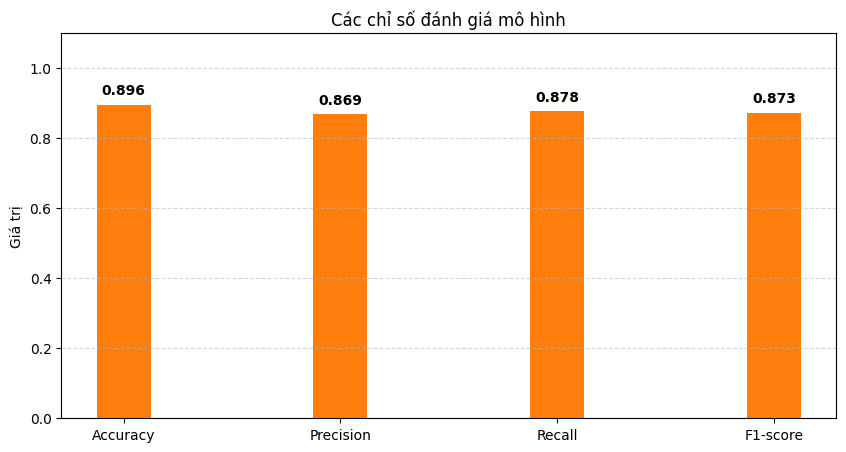

Số lượng bộ test: 690


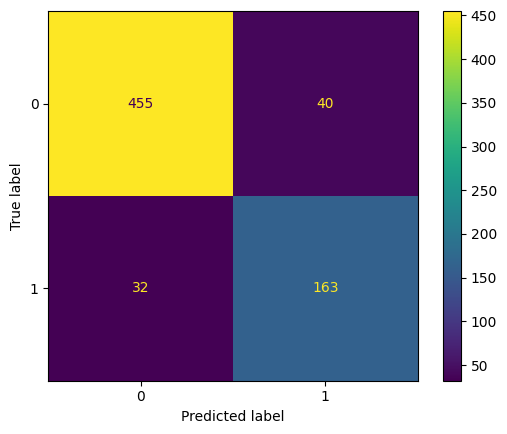

In [ ]:
NB_BoW = train_model_pipeline('NB', X_train_bow, y_train, X_test_bow, y_test, kf_cv=False, smote=False)

## 3.4. Huấn luyện mô hình Navie Bayes kèm với pipeline TF-IDF

Tổng số lượng sample của bộ train: 2757
Số nhãn 0 của tập train: 1978
Số nhãn 1 của tập train: 779
Số lượng nhãn sau khi cân bằng bằng smote:
Nhãn 0: 1978
Nhãn 1: 1978
------------------------------------------------------------------------------------------------------------------------
Đánh giá thử với tập test:
Độ chính xác (Accuracy): 0.881159420289855
Độ chính xác theo nhãn (Precision - macro): 0.8475985663082437
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.8767676767676769
Điểm F1 (F1-score - macro): 0.859672619047619
Báo cáo chi tiết các chỉ số:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       495
           1       0.75      0.87      0.80       195

    accuracy                           0.88       690
   macro avg       0.85      0.88      0.86       690
weighted avg       0.89      0.88      0.88       690



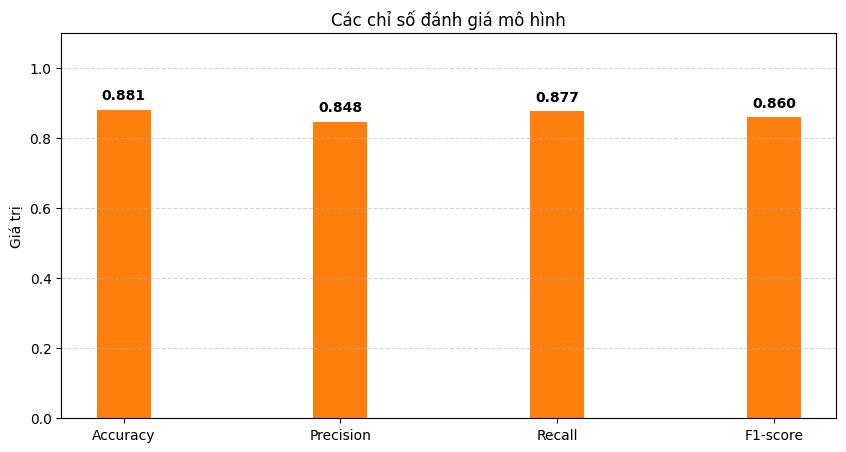

Số lượng bộ test: 690


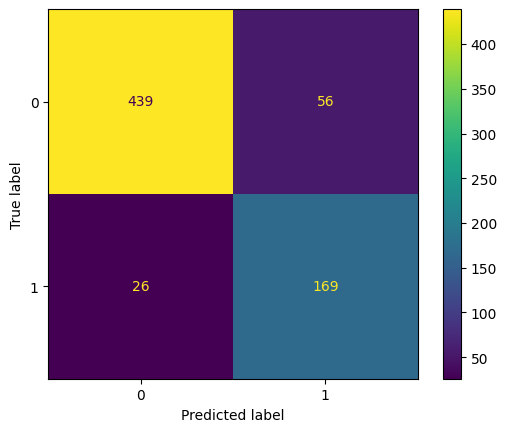

In [ ]:
NB_TFIDF = train_model_pipeline('NB', X_train_tfidf, y_train, X_test_tfidf, y_test, kf_cv=False, smote=False)

## 4.1. Huấn luyện mô hình SVC với pipeline BoW

Tổng số lượng sample của bộ train: 2757
Số nhãn 0 của tập train: 1978
Số nhãn 1 của tập train: 779
Số lượng nhãn sau khi cân bằng bằng smote:
Nhãn 0: 1978
Nhãn 1: 1978
------------------------------------------------------------------------------------------------------------------------
Đánh giá thử với tập test:
Độ chính xác (Accuracy): 0.9130434782608695
Độ chính xác theo nhãn (Precision - macro): 0.9054348676781342
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.8756798756798756
Điểm F1 (F1-score - macro): 0.8888339920948617
Báo cáo chi tiết các chỉ số:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       495
           1       0.89      0.79      0.84       195

    accuracy                           0.91       690
   macro avg       0.91      0.88      0.89       690
weighted avg       0.91      0.91      0.91       690



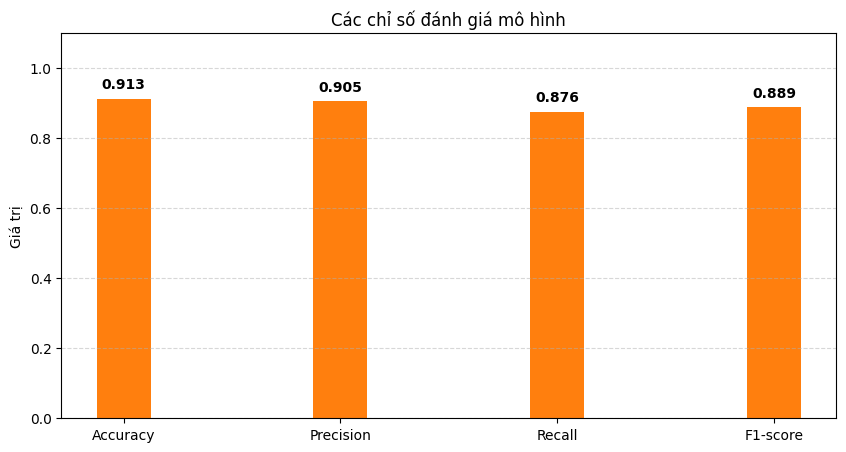

Số lượng bộ test: 690


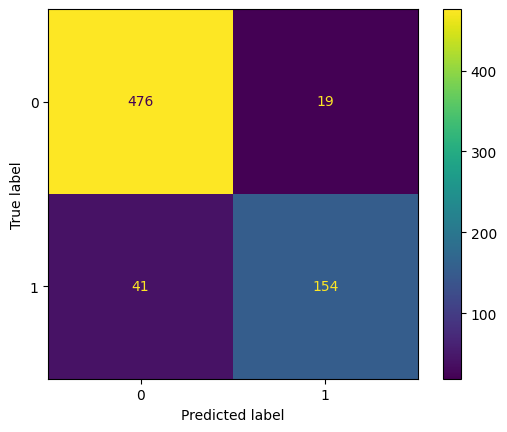

In [ ]:
SVC_BOW = train_model_pipeline('SVC', X_train_bow, y_train, X_test_bow, y_test, kf_cv=False, smote=False)

## 4.2. Train model SVC với pipeline TF-IDF

Tổng số lượng sample của bộ train: 2757
Số nhãn 0 của tập train: 1978
Số nhãn 1 của tập train: 779
Số lượng nhãn sau khi cân bằng bằng smote:
Nhãn 0: 1978
Nhãn 1: 1978
------------------------------------------------------------------------------------------------------------------------
Đánh giá thử với tập test:
Độ chính xác (Accuracy): 0.9217391304347826
Độ chính xác theo nhãn (Precision - macro): 0.9218809035847999
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.8817404817404817
Điểm F1 (F1-score - macro): 0.8988917713206482
Báo cáo chi tiết các chỉ số:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       495
           1       0.92      0.79      0.85       195

    accuracy                           0.92       690
   macro avg       0.92      0.88      0.90       690
weighted avg       0.92      0.92      0.92       690



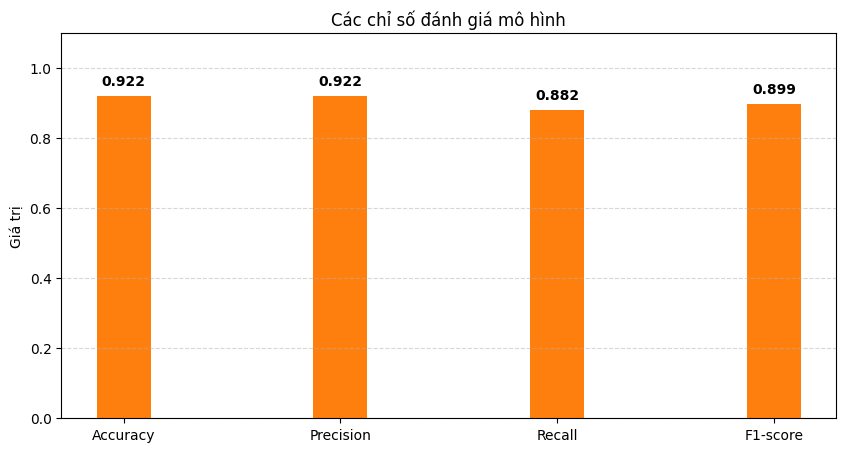

Số lượng bộ test: 690


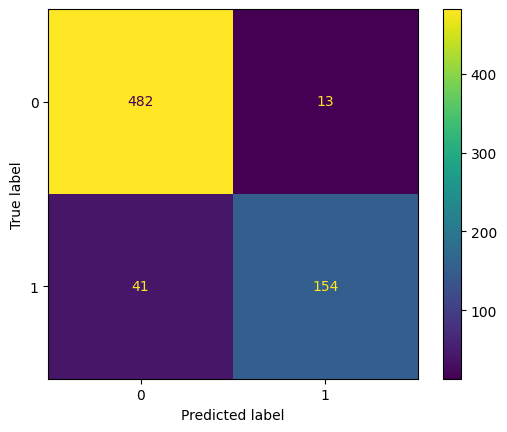

In [ ]:
SVC_TFIDF = train_model_pipeline('SVC', X_train_tfidf, y_train, X_test_tfidf, y_test, kf_cv=False, smote=False)

## 4.3. Train model SVC với chiến lược embedding câu dugf PhoBert

Tổng số lượng sample của bộ train: 2757
Số nhãn 0 của tập train: 1978
Số nhãn 1 của tập train: 779
Số lượng nhãn sau khi cân bằng bằng smote:
Nhãn 0: 1978
Nhãn 1: 1978
------------------------------------------------------------------------------------------------------------------------
Đánh giá thử với tập test:
Độ chính xác (Accuracy): 0.9
Độ chính xác theo nhãn (Precision - macro): 0.8849741046348314
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.8634809634809635
Điểm F1 (F1-score - macro): 0.8732465236641099
Báo cáo chi tiết các chỉ số:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       495
           1       0.85      0.78      0.82       195

    accuracy                           0.90       690
   macro avg       0.88      0.86      0.87       690
weighted avg       0.90      0.90      0.90       690



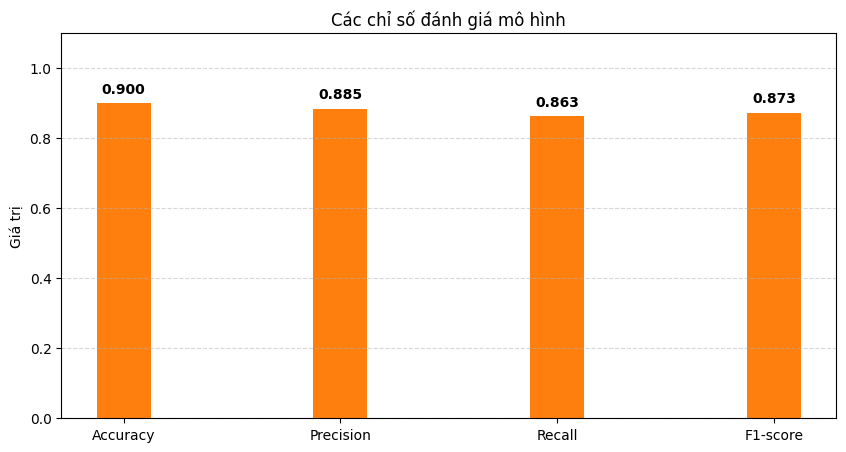

Số lượng bộ test: 690


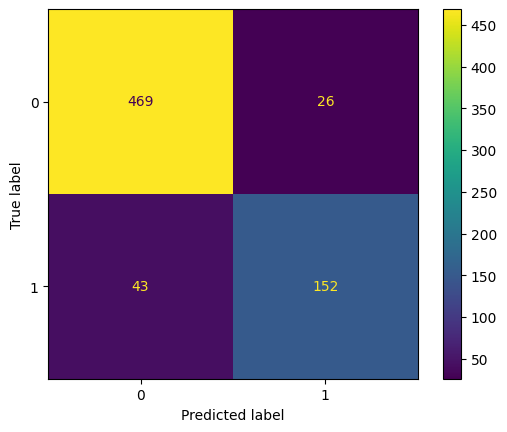

In [ ]:
SVC_PhoBERT = train_model_pipeline('SVC', X_train_phobert, y_train, X_test_phobert, y_test, kf_cv=False, smote=False)

# Test thử với dữ liệu được cop tay từ random bài viết


In [56]:
# Dữ liệu bình luận đầu vào, không dùng smote
mixed_comments = [
    "Ké ạ, tớ cũng hướng nội và khá kiệm lời. Chính vì vậy nên tớ tìm bạn học ngồi cùng cho có động lực chút, chứ tớ cũng ko thích nói chuyện nhiều trong lúc học. Bình thường tớ hay đi On Time Chùa Bộc do gần nhà, có bạn nào đi cùng khum ☺️",
    "mình pass bomber sz L ạ",
    "Đanh LêVT Huyền 2r chiều tại pipe và 10h tối tại tiny cạnh cây xăng bạn nhá, tiếng anh tiếng nhật đủ cả, thậm chí cả code hex có bạn Đanh Lê hiểu thông viết thạo",
    "Mình pass áo bomber size L neww taggg ạ b nào có nhu cầu ib mik nhé",
    "Do Ngoc Duy rủ bạn này đc k chứ nó toàn lọ hư lắm , bài vở thì đầy",
    "Người tham gia ẩn danh 411 ib zl giúp mình với :v 0965216716",
    "Hùng Bùi Nemo đề nghị các bạn nữ xem xét bạn này, bạn còn kèm học chỉ có A+ thoi",
    "Còn ai pass áo khoác ko ạ ? Ib mình zl:0393126606",
    "Lạnh mà đi xe máy thì nó vẫn vậy thôi, oto thì may ra. 😌",
    "Mình pass size XL nhé",
    "Bạn đưa in4 bạn đó đây để ae chúng tôi chăm sóc với đền lỗi hộ bạn",
    "250k combo áo thể dục + áo khoác 🐧 350k combo thduc + áo khoác + bomber 🐧 450k như trên + 1 cặp ptit + sổ tay svien 🐧🐧 500k thêm full quà open day 🐧🐧🐧🐧🐧",
    "Em cần tìm áo polo sz L, mn cần pass thì chấm nha",
    "Mình nhận cài Office 365 và 2019 từ Microsoft nếu bạn cần thì liên hệ mình nhé! 🥹🥹",
    "Mình cần tìm 1 bn nữ ghép trọ cùng. Phòng 2tr ngay nguyễn văn trỗi mộ lao gần ptit và kiến trúc. Có thể vào luôn hoặc sang tháng 12 vô cx đc.",
    "c ơi polo mới mìnhch nhận pass 100k",
    "bạn nào đi học MMT thầy Xanh để ý thì cho minh xin thông tin về đề ktr giữa kì của thầy là trắc nghiệm hay tự luận thế ạ?",
    "Mình có bán áo Bomber size L chua bóc mác nhé. Inbox để trao đổi",
    "Mn ơi cho em hỏi về phần kiểm tra giữa kỳ mmt của thầy X.A thì câu hỏi sẽ ở phần cuối bài tập tổng hợp trong giáo trình thầy cho hay sẽ là 3 câu hỏi mà thầy nói ở buổi đầu tiên ạ!!!",
    "Pass áo bomber new 100% sz XXl",
    "Trước thấy tuyển CLB Rubik PTIT mà ít người vào quá nên bạn mih có lập kênh tt chuyen dạy Rubik mọi người có đam mê vào follow giúp bạn mình với có j học xong vào CLB Rubik ae giao lưu với nhau cho vui. Mih cảm ơn ạ. Link dưới comment",
    "Mình có giáo trình kì 2 năm nhất và năm 2 ngành cntt cần pass như ảnh. B nào cần thì ib mình",
    "Em cẩn thận check thông tin nha. Đầu kỳ trường cảnh báo lừa đảo chuyển tiền đồng phục trực tuyến r. Giá đp này lạ lắm",
    "Ib zalo mình 0395685088",
    "mình pass phòng 3tr2 ở mộ lao cách ptit 300m, vskk, kh chung chủ, có bếp riêng, điều hoà, nóng lạnh,...có thể vào ở cuối tháng này.",
    "0869056822 ib nhé",
    "Mn cho em hỏi là nếu mk trót nghỉ 1b học lại tin 2 thầy Hiến thì có sao ko ạ. Trước em thấy lịch trên qldt hay slink đều là t4 mà nay lại thấy sang t6😭😭",
    "Ib, mới mặc 1,2 lần pass rẻ ạ",
    "Huhu tỉ lệ trượt của DSA nói riêng và các môn kì học lại mùa đông nói chung là bao nhiêu % thế ạ? E thấy khó mà lại học nhanh quá, không biết có phải học thêm kì nữa không 🙁",
    "mình mua bàn chữ L 1m8 1m2 60cm đc 2 tuần giờ chuyển trọ, ko vừa phòng mới, ai có nhu cầu liên hệ mình, mình mua mới 1tr4 pass 1tr ạ.",
    "quả game ptit simulator tải kiểu gì vậy mn",
    "Mình có chút tài liệu VT khoá D20 bạn nào cần ib nha, giá cả free!",
    "Mình hướng nội khá ít nói chuyện, đi cf học bài toàn 1 mình, mình xin 1 slot đc k ạ<3",
    "ib mình mua luôn ạ zl 0368940027",
    "Bạn Quỳnh Quỳnh nhà mình chăm học lắm, ngày nào cũng đi cà phê học bài. Bạn tham khảo nha",
    "ib tui nha shop 90k",
    "Tôi cần thống kê tỉ lệ quay trúng để chứng minh rằng vòng quay may mắn Slinks là bịp 😉",
    "Ai lấy đồng phục mình để cho nè, tại mình đã ra trg nhưng mà áo vẫn mới , free nhé!",
    "Mang ngay đêm chung kết đến cho tôi", 
    "Người tham gia ẩn danh 582 https://www.facebook.com/share/17ZbdYrBk4/?mibextid=wwXIfr kb nhắn tin ạ",
]

# Nhãn tương ứng với từng bình luận: 0 - bình thường, 1 - spam/quảng cáo
labels = [
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,  
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,  
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,  
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,  
]


# Các cột thông tin thêm vào vector đặc trưng
information_col = ['num_emoji', 'num_email', 'num_link', 'num_upper', 'Count_num']

# B1: Đưa text vào DataFrame để tiện xử lý
test = pd.DataFrame(mixed_comments, columns = ['text'])

# B2: Thêm các cột thông tin số lượng (emoji, email, link, uppercase) trước khi tiền xử lý văn bản
test = create_count_col(test, 'text')   # hàm này sẽ thêm các cột: num_emoji, num_email, num_link, num_upper

# B3: Chuẩn hóa/tiền xử lý dữ liệu (bỏ dấu, thường hóa, loại bỏ stopword,...)
test['text'] = test['text'].apply(pipeline_preprocess)


# -------------------------- Đánh giá với pipeline BoW --------------------------
# B4.1: Ánh xạ sang vector BoW
input_text = BoW.transform(test['text'])

# B5.1: Kết hợp vectơ BoW với thông tin đặc trưng phụ
input_data = hstack([input_text, csr_matrix(test[information_col])]) # dán 2 phần lại

# --------------------------  Dự đoán, đánh giá với model NB_BOW --------------------------
predict = NB_BoW.predict(input_data)
print('-'* 120)
print("BoW - Naive Bayes: ")
print(f"Nhãn dự đoán: {predict}")
print("Độ chính xác (Accuracy):", accuracy_score(labels, predict))
print("Độ chính xác theo nhãn (Precision - macro):", precision_score(labels, predict, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict, average='macro'))
print("Điểm F1 (F1-score - macro):", f1_score(labels, predict, average='macro'))
print("Báo cáo chi tiết các chỉ số:")
print(classification_report(labels, predict))
print('-'* 120)

# --------------------------  Dự đoán, đánh giá với model SVC_BOW --------------------------
print('-'* 120)
predict_svc_bow = SVC_BOW.predict(input_data)
print("BoW - SVC: ")
print(f"Nhãn dự đoán: {predict}")
print("Độ chính xác (Accuracy):", accuracy_score(labels, predict_svc_bow))
print("Độ chính xác theo nhãn (Precision - macro):", precision_score(labels, predict_svc_bow, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict_svc_bow, average='macro'))
print("Điểm F1 (F1-score - macro):", f1_score(labels, predict_svc_bow, average='macro'))
print("Báo cáo chi tiết các chỉ số:")
print(classification_report(labels, predict_svc_bow))
print('-'* 120)

# -------------------------- Đánh giá với pipeline TF-IDF --------------------------

# B4.2: Vector hóa text bằng TF-IDF
input_text_tfidf = Tfidf.transform(test['text']).toarray()

# B5.2: Kết hợp TF-IDF với các cột thông tin phụ đã tách ra
input_data_tfidf = hstack([input_text_tfidf, csr_matrix(test[information_col])])

# --------------------------  Dự đoán, đánh giá với model NB_TFIDF --------------------------
predict_tfidf = NB_TFIDF.predict(input_data_tfidf)
print('-'* 120)
print("TF-IDF - Naive Bayes: ")
print(f"Nhãn dự đoán: {predict}")
print("Độ chính xác (Accuracy):", accuracy_score(labels, predict_tfidf))
print("Độ chính xác theo nhãn (Precision - macro):", precision_score(labels, predict_tfidf, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict_tfidf, average='macro'))
print("Điểm F1 (F1-score - macro):", f1_score(labels, predict_tfidf, average='macro'))
print("Báo cáo chi tiết các chỉ số:")
print(classification_report(labels, predict_tfidf))
print('-'* 120)


# --------------------------  Dự đoán, đánh giá với model SVC_TFIDF --------------------------
print('-'* 120)
predict_svc_tfidf = SVC_TFIDF.predict(input_data_tfidf)
print("TF-IDF - SVC: ")
print(f"Nhãn dự đoán: {predict}")
print("Độ chính xác (Accuracy):", accuracy_score(labels, predict_svc_tfidf))
print("Độ chính xác theo nhãn (Precision - macro):", precision_score(labels, predict_svc_tfidf, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict_svc_tfidf, average='macro'))
print("Điểm F1 (F1-score - macro):", f1_score(labels, predict_svc_tfidf, average='macro'))
print("Báo cáo chi tiết các chỉ số:")
print(classification_report(labels, predict_svc_tfidf))
print('-'* 120)



# --------------------------  Dự đoán, đánh giá với model SVC_TFIDF --------------------------
# B4.3. Embedding  
test_pb_emb = get_phobert_embeddings(test['text'].tolist(), batch_size=8)
# B5.3: Kết hợp vector embeding với các cột thông tin phụ đã tách ra
test_pb_data = np.hstack([test_pb_emb, test[information_col].values])

# Predict
predict_pb = SVC_PhoBERT.predict(test_pb_data)

# Đánh giá
print('-'* 120)
print("PhoBERT - SVC:")
print(f"Nhãn dự đoán: {predict}")
print("Độ chính xác (Accuracy)", accuracy_score(labels, predict_pb))
print("Độ chính xác theo nhãn (Precision - macro)", precision_score(labels, predict_pb, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict_pb, average='macro'))
print("Điểm F1 (F1-score - macro)", f1_score(labels, predict_pb, average='macro'))
print(classification_report(labels, predict_pb))
print('-'* 120)

torch.cuda.empty_cache()


------------------------------------------------------------------------------------------------------------------------
BoW - Naive Bayes: 
Nhãn dự đoán: [0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 1 1]
Độ chính xác (Accuracy): 0.925
Độ chính xác theo nhãn (Precision - macro): 0.9347826086956521
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.925
Điểm F1 (F1-score - macro): 0.9245757385292269
Báo cáo chi tiết các chỉ số:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.87      1.00      0.93        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------

100%|██████████| 5/5 [00:01<00:00,  4.39it/s]


------------------------------------------------------------------------------------------------------------------------
PhoBERT - SVC:
Nhãn dự đoán: [0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 1 1]
Độ chính xác (Accuracy) 0.775
Độ chính xác theo nhãn (Precision - macro) 0.7756892230576441
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.775
Điểm F1 (F1-score - macro) 0.7748592870544091
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.79      0.75      0.77        20

    accuracy                           0.78        40
   macro avg       0.78      0.78      0.77        40
weighted avg       0.78      0.78      0.77        40

------------------------------------------------------------------------------------------------------------------------


In [66]:
# Dữ liệu bình luận đầu vào, dùng smote
mixed_comments = [
    "Ké ạ, tớ cũng hướng nội và khá kiệm lời. Chính vì vậy nên tớ tìm bạn học ngồi cùng cho có động lực chút, chứ tớ cũng ko thích nói chuyện nhiều trong lúc học. Bình thường tớ hay đi On Time Chùa Bộc do gần nhà, có bạn nào đi cùng khum ☺️",
    "mình pass bomber sz L ạ",
    "Đanh LêVT Huyền 2r chiều tại pipe và 10h tối tại tiny cạnh cây xăng bạn nhá, tiếng anh tiếng nhật đủ cả, thậm chí cả code hex có bạn Đanh Lê hiểu thông viết thạo",
    "Mình pass áo bomber size L neww taggg ạ b nào có nhu cầu ib mik nhé",
    "Do Ngoc Duy rủ bạn này đc k chứ nó toàn lọ hư lắm , bài vở thì đầy",
    "Người tham gia ẩn danh 411 ib zl giúp mình với :v 0965216716",
    "Hùng Bùi Nemo đề nghị các bạn nữ xem xét bạn này, bạn còn kèm học chỉ có A+ thoi",
    "Còn ai pass áo khoác ko ạ ? Ib mình zl:0393126606",
    "Lạnh mà đi xe máy thì nó vẫn vậy thôi, oto thì may ra. 😌",
    "Mình pass size XL nhé",
    "Bạn đưa in4 bạn đó đây để ae chúng tôi chăm sóc với đền lỗi hộ bạn",
    "250k combo áo thể dục + áo khoác 🐧 350k combo thduc + áo khoác + bomber 🐧 450k như trên + 1 cặp ptit + sổ tay svien 🐧🐧 500k thêm full quà open day 🐧🐧🐧🐧🐧",
    "Em cần tìm áo polo sz L, mn cần pass thì chấm nha",
    "Mình nhận cài Office 365 và 2019 từ Microsoft nếu bạn cần thì liên hệ mình nhé! 🥹🥹",
    "Mình cần tìm 1 bn nữ ghép trọ cùng. Phòng 2tr ngay nguyễn văn trỗi mộ lao gần ptit và kiến trúc. Có thể vào luôn hoặc sang tháng 12 vô cx đc.",
    "c ơi polo mới mìnhch nhận pass 100k",
    "bạn nào đi học MMT thầy Xanh để ý thì cho minh xin thông tin về đề ktr giữa kì của thầy là trắc nghiệm hay tự luận thế ạ?",
    "Mình có bán áo Bomber size L chua bóc mác nhé. Inbox để trao đổi",
    "Mn ơi cho em hỏi về phần kiểm tra giữa kỳ mmt của thầy X.A thì câu hỏi sẽ ở phần cuối bài tập tổng hợp trong giáo trình thầy cho hay sẽ là 3 câu hỏi mà thầy nói ở buổi đầu tiên ạ!!!",
    "Pass áo bomber new 100% sz XXl",
    "Trước thấy tuyển CLB Rubik PTIT mà ít người vào quá nên bạn mih có lập kênh tt chuyen dạy Rubik mọi người có đam mê vào follow giúp bạn mình với có j học xong vào CLB Rubik ae giao lưu với nhau cho vui. Mih cảm ơn ạ. Link dưới comment",
    "Mình có giáo trình kì 2 năm nhất và năm 2 ngành cntt cần pass như ảnh. B nào cần thì ib mình",
    "Em cẩn thận check thông tin nha. Đầu kỳ trường cảnh báo lừa đảo chuyển tiền đồng phục trực tuyến r. Giá đp này lạ lắm",
    "Ib zalo mình 0395685088",
    "mình pass phòng 3tr2 ở mộ lao cách ptit 300m, vskk, kh chung chủ, có bếp riêng, điều hoà, nóng lạnh,...có thể vào ở cuối tháng này.",
    "0869056822 ib nhé",
    "Mn cho em hỏi là nếu mk trót nghỉ 1b học lại tin 2 thầy Hiến thì có sao ko ạ. Trước em thấy lịch trên qldt hay slink đều là t4 mà nay lại thấy sang t6😭😭",
    "Ib, mới mặc 1,2 lần pass rẻ ạ",
    "Huhu tỉ lệ trượt của DSA nói riêng và các môn kì học lại mùa đông nói chung là bao nhiêu % thế ạ? E thấy khó mà lại học nhanh quá, không biết có phải học thêm kì nữa không 🙁",
    "mình mua bàn chữ L 1m8 1m2 60cm đc 2 tuần giờ chuyển trọ, ko vừa phòng mới, ai có nhu cầu liên hệ mình, mình mua mới 1tr4 pass 1tr ạ.",
    "quả game ptit simulator tải kiểu gì vậy mn",
    "Mình có chút tài liệu VT khoá D20 bạn nào cần ib nha, giá cả free!",
    "Mình hướng nội khá ít nói chuyện, đi cf học bài toàn 1 mình, mình xin 1 slot đc k ạ<3",
    "ib mình mua luôn ạ zl 0368940027",
    "Bạn Quỳnh Quỳnh nhà mình chăm học lắm, ngày nào cũng đi cà phê học bài. Bạn tham khảo nha",
    "ib tui nha shop 90k",
    "Tôi cần thống kê tỉ lệ quay trúng để chứng minh rằng vòng quay may mắn Slinks là bịp 😉",
    "Ai lấy đồng phục mình để cho nè, tại mình đã ra trg nhưng mà áo vẫn mới , free nhé!",
    "Mang ngay đêm chung kết đến cho tôi", 
    "Người tham gia ẩn danh 582 https://www.facebook.com/share/17ZbdYrBk4/?mibextid=wwXIfr kb nhắn tin ạ",
]

# Nhãn tương ứng với từng bình luận: 0 - bình thường, 1 - spam/quảng cáo
labels = [
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,  
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,  
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,  
    0, 1, 0, 1, 0, 1, 0, 1, 0, 1,  
]


# Các cột thông tin thêm vào vector đặc trưng
information_col = ['num_emoji', 'num_email', 'num_link', 'num_upper', 'Count_num']

# B1: Đưa text vào DataFrame để tiện xử lý
test = pd.DataFrame(mixed_comments, columns = ['text'])

# B2: Thêm các cột thông tin số lượng (emoji, email, link, uppercase) trước khi tiền xử lý văn bản
test = create_count_col(test, 'text')   # hàm này sẽ thêm các cột: num_emoji, num_email, num_link, num_upper

# B3: Chuẩn hóa/tiền xử lý dữ liệu (bỏ dấu, thường hóa, loại bỏ stopword,...)
test['text'] = test['text'].apply(pipeline_preprocess)


# -------------------------- Đánh giá với pipeline BoW --------------------------
# B4.1: Ánh xạ sang vector BoW
input_text = BoW.transform(test['text'])

# B5.1: Kết hợp vectơ BoW với thông tin đặc trưng phụ
input_data = hstack([input_text, csr_matrix(test[information_col])]) # dán 2 phần lại

# --------------------------  Dự đoán, đánh giá với model NB_BOW --------------------------
predict = NB_BoW.predict(input_data)
print('-'* 120)
print("BoW - Naive Bayes: ")
print(f"Nhãn dự đoán: {predict}")
print("Độ chính xác (Accuracy):", accuracy_score(labels, predict))
print("Độ chính xác theo nhãn (Precision - macro):", precision_score(labels, predict, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict, average='macro'))
print("Điểm F1 (F1-score - macro):", f1_score(labels, predict, average='macro'))
print("Báo cáo chi tiết các chỉ số:")
print(classification_report(labels, predict))
print('-'* 120)

# --------------------------  Dự đoán, đánh giá với model SVC_BOW --------------------------
print('-'* 120)
predict_svc_bow = SVC_BOW.predict(input_data)
print("BoW - SVC: ")
print(f"Nhãn dự đoán: {predict}")
print("Độ chính xác (Accuracy):", accuracy_score(labels, predict_svc_bow))
print("Độ chính xác theo nhãn (Precision - macro):", precision_score(labels, predict_svc_bow, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict_svc_bow, average='macro'))
print("Điểm F1 (F1-score - macro):", f1_score(labels, predict_svc_bow, average='macro'))
print("Báo cáo chi tiết các chỉ số:")
print(classification_report(labels, predict_svc_bow))
print('-'* 120)

# -------------------------- Đánh giá với pipeline TF-IDF --------------------------

# B4.2: Vector hóa text bằng TF-IDF
input_text_tfidf = Tfidf.transform(test['text']).toarray()

# B5.2: Kết hợp TF-IDF với các cột thông tin phụ đã tách ra
input_data_tfidf = hstack([input_text_tfidf, csr_matrix(test[information_col])])

# --------------------------  Dự đoán, đánh giá với model NB_TFIDF --------------------------
predict_tfidf = NB_TFIDF.predict(input_data_tfidf)
print('-'* 120)
print("TF-IDF - Naive Bayes: ")
print(f"Nhãn dự đoán: {predict}")
print("Độ chính xác (Accuracy):", accuracy_score(labels, predict_tfidf))
print("Độ chính xác theo nhãn (Precision - macro):", precision_score(labels, predict_tfidf, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict_tfidf, average='macro'))
print("Điểm F1 (F1-score - macro):", f1_score(labels, predict_tfidf, average='macro'))
print("Báo cáo chi tiết các chỉ số:")
print(classification_report(labels, predict_tfidf))
print('-'* 120)


# --------------------------  Dự đoán, đánh giá với model SVC_TFIDF --------------------------
print('-'* 120)
predict_svc_tfidf = SVC_TFIDF.predict(input_data_tfidf)
print("TF-IDF - SVC: ")
print(f"Nhãn dự đoán: {predict}")
print("Độ chính xác (Accuracy):", accuracy_score(labels, predict_svc_tfidf))
print("Độ chính xác theo nhãn (Precision - macro):", precision_score(labels, predict_svc_tfidf, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict_svc_tfidf, average='macro'))
print("Điểm F1 (F1-score - macro):", f1_score(labels, predict_svc_tfidf, average='macro'))
print("Báo cáo chi tiết các chỉ số:")
print(classification_report(labels, predict_svc_tfidf))
print('-'* 120)



# --------------------------  Dự đoán, đánh giá với model SVC_TFIDF --------------------------
# B4.3. Embedding  
test_pb_emb = get_phobert_embeddings(test['text'].tolist(), batch_size=8)
# B5.3: Kết hợp vector embeding với các cột thông tin phụ đã tách ra
test_pb_data = np.hstack([test_pb_emb, test[information_col].values])

# Predict
predict_pb = SVC_PhoBERT.predict(test_pb_data)

# Đánh giá
print('-'* 120)
print("PhoBERT - SVC:")
print(f"Nhãn dự đoán: {predict}")
print("Độ chính xác (Accuracy)", accuracy_score(labels, predict_pb))
print("Độ chính xác theo nhãn (Precision - macro)", precision_score(labels, predict_pb, average='macro'))
print("Tỉ lệ thu hồi theo nhãn (Recall - macro):", recall_score(labels, predict_pb, average='macro'))
print("Điểm F1 (F1-score - macro)", f1_score(labels, predict_pb, average='macro'))
print(classification_report(labels, predict_pb))
print('-'* 120)

torch.cuda.empty_cache()


------------------------------------------------------------------------------------------------------------------------
BoW - Naive Bayes: 
Nhãn dự đoán: [0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0
 1 1 1]
Độ chính xác (Accuracy): 0.85
Độ chính xác theo nhãn (Precision - macro): 0.8846153846153846
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.85
Điểm F1 (F1-score - macro): 0.8465473145780051
Báo cáo chi tiết các chỉ số:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        20
           1       0.77      1.00      0.87        20

    accuracy                           0.85        40
   macro avg       0.88      0.85      0.85        40
weighted avg       0.88      0.85      0.85        40

------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------

100%|██████████| 5/5 [00:00<00:00,  6.25it/s]


------------------------------------------------------------------------------------------------------------------------
PhoBERT - SVC:
Nhãn dự đoán: [0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0
 1 1 1]
Độ chính xác (Accuracy) 0.6
Độ chính xác theo nhãn (Precision - macro) 0.6098901098901099
Tỉ lệ thu hồi theo nhãn (Recall - macro): 0.6
Điểm F1 (F1-score - macro) 0.5907928388746804
              precision    recall  f1-score   support

           0       0.58      0.75      0.65        20
           1       0.64      0.45      0.53        20

    accuracy                           0.60        40
   macro avg       0.61      0.60      0.59        40
weighted avg       0.61      0.60      0.59        40

------------------------------------------------------------------------------------------------------------------------
